# Forward Kinematics tutorial

we'll demonstrate forward kinematics on a baxter robot

## Setup

In [1]:
import numpy as np

from pykin.robot import Robot
from pykin.kinematics.transform import Transform
from pykin.utils import plot_utils as plt

# support for changing text color in terminal 
from pykin.utils.kin_utils import ShellColors as sc

In [2]:
# set baxter urdf files path
file_path = '../asset/urdf/baxter/baxter.urdf'

# set your robot
robot = Robot(fname=file_path, offset=Transform(rot=[0.0, 0.0, 0.0], pos=[0, 0, 0]))

If you are not sure about the dof of the robot, you can check the dof and active joint names.

In [3]:
print(robot.dof, robot.active_joint_names)


15 ['head_pan', 'right_s0', 'right_s1', 'right_e0', 'right_e1', 'right_w0', 'right_w1', 'right_w2', 'left_s0', 'left_s1', 'left_e0', 'left_e1', 'left_w0', 'left_w1', 'left_w2']


In [4]:
# set the angles you want
# Either list or np.array type doesn't matter
head_thetas = np.array([0.0])
right_arm_thetas = np.array([-np.pi/3, 0, 0, 0, 0, 0, 0])
left_arm_thetas = np.array([np.pi/3, 0, 0, 0, 0, 0, 0])

# If you set thetas with numpy, you can concatenate using concatenate or hstack method
thetas = np.concatenate((head_thetas, right_arm_thetas, left_arm_thetas))
print(thetas)

[ 0.         -1.04719755  0.          0.          0.          0.
  0.          0.          1.04719755  0.          0.          0.
  0.          0.          0.        ]


## Compute Forward Kinematics

In [5]:
transformations = robot.kin.forward_kinematics(thetas=thetas)

In [6]:
for link, transform in transformations.items():
    print(f"{sc.HEADER}{link}{sc.ENDC}, {transform.rot}, {transform.pos}")

base, [1. 0. 0. 0.], [0. 0. 0.]
collision_head_link_1, [1. 0. 0. 0.], [0.11 0.   0.75]
collision_head_link_2, [1. 0. 0. 0.], [0.11 0.   0.75]
torso, [1. 0. 0. 0.], [0. 0. 0.]
left_torso_itb, [ 3.27579908e-05 -3.27579908e-05  7.07106780e-01  7.07106780e-01], [-0.08897   0.15593   0.389125]
right_torso_itb, [0.70710678 0.70710678 0.         0.        ], [-0.08897  -0.15593   0.389125]
pedestal, [1. 0. 0. 0.], [0. 0. 0.]
head, [1. 0. 0. 0.], [0.06  0.    0.686]
dummyhead1, [1. 0. 0. 0.], [0.06  0.    0.686]
screen, [0.45309853 0.54286437 0.54286437 0.45309853], [0.1827 0.     0.686 ]
display, [0.45309853 0.54286437 0.54286437 0.45309853], [1.79839090e-01 1.40096268e-14 6.70257853e-01]
head_camera, [0.45309853 0.54286437 0.54286437 0.45309853], [0.18839 0.      0.74968]
sonar_ring, [1. 0. 0. 0.], [0.0947 0.     0.817 ]
right_arm_mount, [ 0.92387918  0.          0.         -0.38268428], [ 0.024645 -0.219645  0.118588]
right_upper_shoulder, [ 0.6087607  0.         0.        -0.7933539], [ 0.

you can do visualization using plot_utils module

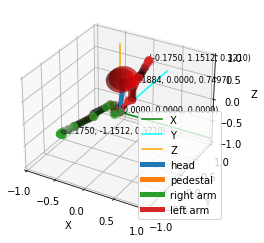

In [7]:
fig, ax = plt.init_3d_figure()
plt.plot_robot(robot, 
               transformations=transformations,
               ax=ax, 
               name=robot.robot_name,
               visible_visual=False, 
               visible_collision=True, 
               mesh_path='../asset/urdf/baxter/')
ax.legend()

### If you want to know transformation of desired link, you must write set_desired_frame

In [8]:
# Write the name of the link at the beginning and the name of the link at the end.
robot.set_desired_frame(base_name="base", eef_name="left_wrist")
print(robot.active_joint_names)

['left_s0', 'left_s1', 'left_e0', 'left_e1', 'left_w0', 'left_w1', 'left_w2']


In [9]:
left_arm_transformations = robot.kin.forward_kinematics(left_arm_thetas)

In [10]:
for link, T in left_arm_transformations.items():
    print(f"link: {link}, pose:{np.concatenate((T.pos, T.rot))} ")

link: torso, pose:[0. 0. 0. 1. 0. 0. 0.] 
link: left_arm_mount, pose:[0.024645   0.219645   0.118588   0.92387918 0.         0.
 0.38268428] 
link: left_upper_shoulder, pose:[0.06402724 0.25902738 0.129626   0.6087607  0.         0.
 0.7933539 ] 
link: left_lower_shoulder, pose:[ 0.0461686   0.32567623  0.399976    0.43045882 -0.43045882 -0.56098592
  0.56098592] 
link: left_upper_elbow_visual, pose:[ 0.01847478  0.42903025  0.399976    0.43045882 -0.56098592  0.43045882
  0.56098592] 
link: left_upper_elbow, pose:[ 0.01976888  0.42420062  0.399976    0.43045882 -0.56098592  0.43045882
  0.56098592] 
link: left_lower_elbow, pose:[-0.04815088  0.67767875  0.330976    0.43045882 -0.43045882 -0.56098592
  0.56098592] 
link: left_upper_forearm_visual, pose:[-0.07092711  0.76268018  0.330976    0.43045882 -0.56098592  0.43045882
  0.56098592] 
link: left_upper_forearm, pose:[-0.07496213  0.77773896  0.330976    0.43045882 -0.56098592  0.43045882
  0.56098592] 
link: left_lower_forearm, pose

### Unlike other robots, the Baxter robot needs to set the plot name to something other than baxter.

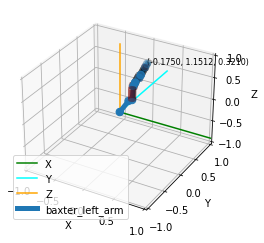

In [11]:
fig, ax = plt.init_3d_figure()
plt.plot_robot(robot, 
               transformations=left_arm_transformations,
               ax=ax, 
               name=robot.robot_name+"_left_arm",
               visible_visual=False, 
               visible_collision=True, 
               mesh_path='../asset/urdf/baxter/')
ax.legend()

### If you want to reknow transformation of all links, you must write reset_desired_frames

In [12]:
robot.reset_desired_frames()
fk = robot.kin.forward_kinematics(thetas)
print(robot.active_joint_names)

['head_pan', 'right_s0', 'right_s1', 'right_e0', 'right_e1', 'right_w0', 'right_w1', 'right_w2', 'left_s0', 'left_s1', 'left_e0', 'left_e1', 'left_w0', 'left_w1', 'left_w2']


In [13]:
fig, ax = plt.init_3d_figure()
plt.plot_robot(robot, 
               transformations=transformations,
               ax=ax, 
               name=robot.robot_name,
               visible_visual=False, 
               visible_collision=True, 
               mesh_path='../asset/urdf/baxter/')
ax.legend()